In [18]:
import numpy as np
import pandas as pd
import datetime
import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import random

import numpy as np
import pandas as pd

from pprint import pprint


mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

In [19]:
df = pd.read_csv("weather_data.csv")
df.head()

,Date,Time,Weather condition,Temperature in celsius,wind speed (m/s),Wind direction,atmosphere pressure,Humidity (%)
0,1/1/2003,0:00,Overcast,-8,4,North,745,71
1,1/1/2003,3:00,Overcast,-8,2,North,746,73
2,1/1/2003,6:00,Overcast,-13,2,East,747,80
3,1/1/2003,9:00,Overcast,-9,3,East,747,74
4,1/1/2003,12:00,Overcast,-6,6,Southeast,744,62


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117392 entries, 0 to 117391
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Date                    117392 non-null  object
 1   Time                    117392 non-null  object
 2   Weather condition       117392 non-null  object
 3   Temperature in celsius  117392 non-null  int64 
 4   wind speed (m/s)        117392 non-null  int64 
 5   Wind direction          117392 non-null  object
 6   atmosphere pressure     117392 non-null  int64 
 7   Humidity (%)            117392 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 7.2+ MB


In [21]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Temperature in celsius,117392.0,-1.701768,5.055204,-14.0,-6.0,-1.0,2.0,10.0
wind speed (m/s),117392.0,2.698787,2.087181,0.0,1.0,2.0,4.0,8.0
atmosphere pressure,117392.0,741.683905,5.651405,722.0,739.0,743.0,745.0,767.0
Humidity (%),117392.0,74.885299,25.706540,0.0,66.0,82.0,93.0,100.0


In [22]:
date_time = pd.to_datetime(df.pop('Date') + ' ' + df.pop('Time'),  infer_datetime_format=True)


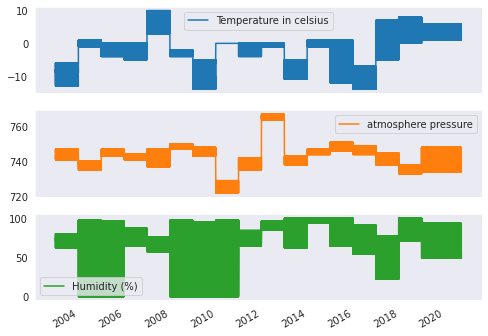

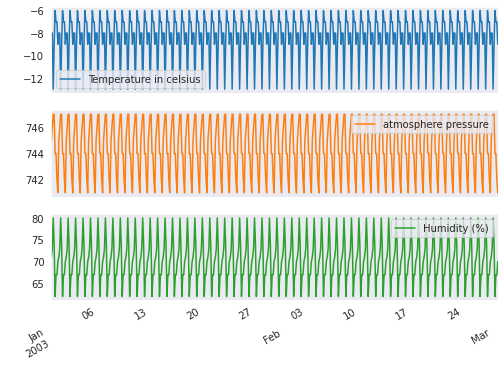

In [23]:
plot_cols = ['Temperature in celsius', 'atmosphere pressure', 'Humidity (%)']
plot_features = df[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

plot_features = df[plot_cols][:480]
plot_features.index = date_time[:480]
_ = plot_features.plot(subplots=True)

In [24]:
df["Wind direction"].value_counts()


East         35779
North        30747
Northwest    20085
West         15574
Southwest     6636
Southeast     5840
South         2000
Northeast      731
Name: Wind direction, dtype: int64

In [25]:
wind_dir_replace = {"Wind direction" : {  "North":0,
                                              "Northeast":45,                                              
                                              "East": 90,
                                              "Southeast":135, 
                                              "South":180,
                                              "Southwest":225,  
                                              "West":270,
                                              "Northwest":315
                                             }
                         }
df.replace(wind_dir_replace, inplace = True)
df.head()

,Weather condition,Temperature in celsius,wind speed (m/s),Wind direction,atmosphere pressure,Humidity (%)
0,Overcast,-8,4,0,745,71
1,Overcast,-8,2,0,746,73
2,Overcast,-13,2,90,747,80
3,Overcast,-9,3,90,747,74
4,Overcast,-6,6,135,744,62


In [26]:
df["Weather condition"].value_counts()


Sunny                            47662
Overcast                         23269
Partly cloudy                     6937
Mostly cloudly                    5753
Mostly sunny                      5380
Haze                              5113
Cloudly                           5017
Fog                               4752
Light rain                        2555
Overcast;snow                     1825
Mostly cloudly;rain               1825
Mostly cloudly;snow               1825
Light snow                        1463
Cloudly;rain with snow            1095
Light shower rain                 1095
Cloudly;rain                       730
Heavy snow                         366
Heavy rain                         365
Mostly cloudly;rain with snow      365
Name: Weather condition, dtype: int64

## Feature Engineering
### Wind

In [27]:
wind_speed = df.pop('wind speed (m/s)')

wind_direction_radian = df.pop('Wind direction')* np.pi / 180

df['Wx (m/s)'] = wind_speed * np.cos(wind_direction_radian)
df['Wy (m/s)'] = wind_speed * np.sin(wind_direction_radian)


(-5.65685424949238, 4.949747468305832, -7.0, 8.0)

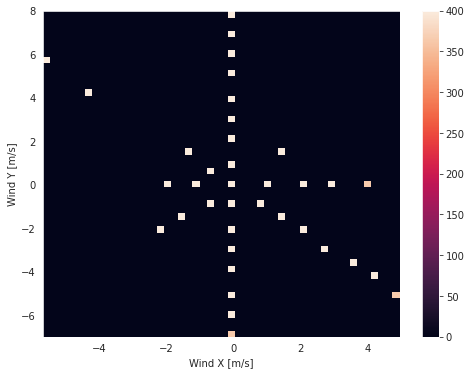

In [28]:
plt.hist2d(df['Wx (m/s)'], df['Wy (m/s)'], bins=(50, 50), vmax=400)
plt.colorbar()
plt.xlabel('Wind X [m/s]')
plt.ylabel('Wind Y [m/s]')
ax = plt.gca()
ax.axis('tight')

## Periodicity of Date Time

In [29]:
timestamp_s = date_time.map(datetime.datetime.timestamp)

In [30]:
day = 24*60*60
year = (365.2425)*day

df['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
df['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
df['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
df['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))

Text(0.5, 1.0, 'Time of day signal')

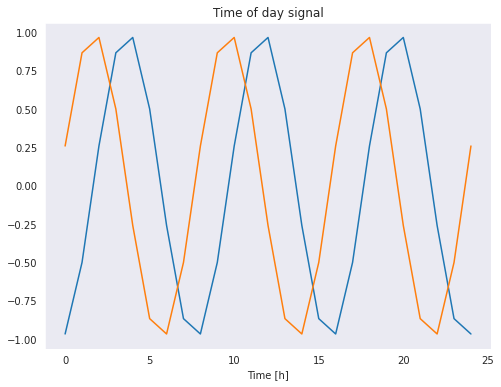

In [31]:
plt.plot(np.array(df['Day sin'])[:25])
plt.plot(np.array(df['Day cos'])[:25])
plt.xlabel('Time [h]')
plt.title('Time of day signal')

In [32]:
temp_labels = df["Temperature in celsius"]
weather_condition_labels = df["Weather condition"]
data = df.drop(["Weather condition", "Temperature in celsius"] , axis =1 )
temp_data = data.copy()
weather_condition_data = data.copy()
temp_data["label"] = temp_labels
weather_condition_data["label"] = weather_condition_labels


## Save Prepared Data

In [37]:
weather_condition_data.to_csv("weather_condition_data.csv", index = False)
temp_data.to_csv("temperature_data.csv", index = False)